In [1]:
import pandas as pd #import library pandas
import numpy as np #import library numpy

#memberikan list nama pada tabel 
name = ['class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 
        'total phenols', 'flavanoids', 'nonflavanoid phenols','proanthocyanins', 
       'color intensity', 'hue', 'OD280/OD315 of diluted wines', 'proline'
       ]
data = pd.read_csv('wine.data', names = name, header = None)
data.head(10) #menampilkan jumlah dataset yang ingin ditampilkan

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [2]:
#untuk menampilkan informasi data data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity of ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  proli

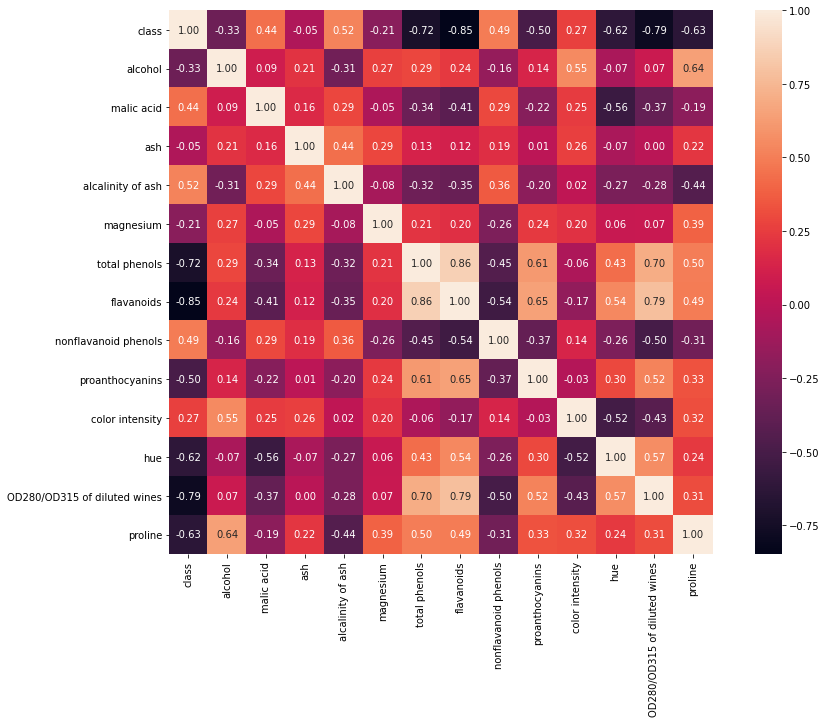

In [3]:
from sklearn import preprocessing #import library preprocessing dari sklearn
import matplotlib.pyplot as plt #import library matplotlib.pyplot
import seaborn as sns #import library seaborn

correlation = data.corr()
plt.figure(figsize = (15,10)) #menentukan ukuran gambar
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show()

In [10]:
#memanggil dan mengimport sklearn modul train_test_split untuk membagi dataset
from sklearn.model_selection import train_test_split #import library matplotlib.pyplot

#memmilih fitur yang digunakan dalam sistem
X = data[['total phenols', 'flavanoids']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=2) 
#mendeklarasikan variabel dan menyimpan data ke dalam variabel
#dengan ukuran data testing 30% dan random data dilakukan sebanyak 2 kali

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#nilai gini 
clf = DecisionTreeClassifier(max_depth=5) #Manipulasi akurasi di sini
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)

[1 1 3 1 1 1 1 3 2 1 2 1 1 2 2 2 1 1 2 3 2 1 2 2 1 1 2 1 1 1 3 2 2 3 1 2 3
 1 2 2 3 3 1 1 3 2 2 1 2 1 1 2 1 2]


In [11]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

#mencetak hasil akurasi dari sistem yang diperoleh
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.7778


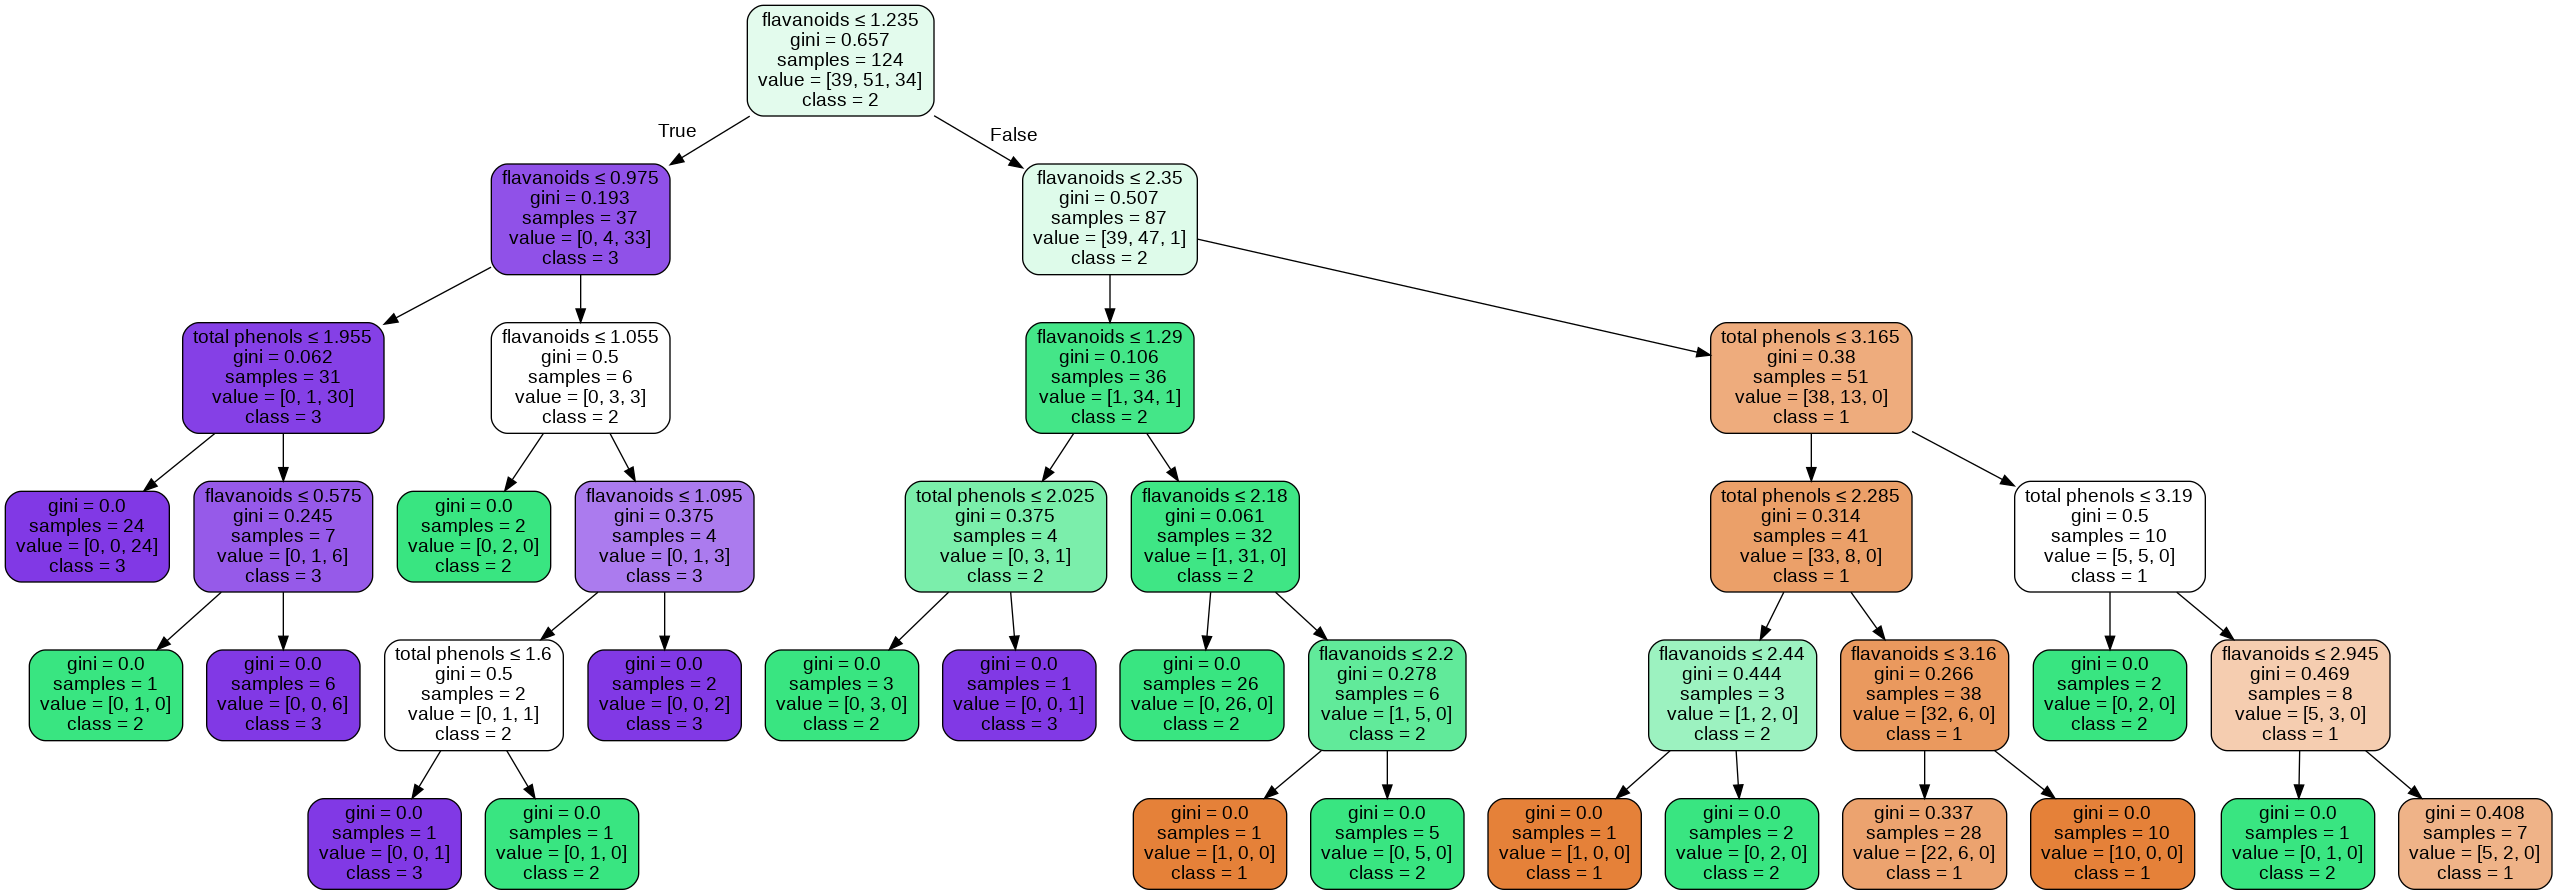

In [7]:
#menampilakan model dari decesion tree
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

feature_cols = ['total phenols', 'flavanoids']

dot_data = StringIO()
export_graphviz(
    clf, out_file=dot_data,
    filled=True, rounded = True,
    special_characters = True,
    feature_names = feature_cols,
    class_names = ['1', '2','3']
    )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('1.png')
Image(graph.create_png())

In [12]:
#mencetak hasil nilai akurasi, precisoion, recall dan F1Score pada data testing

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           1       0.76      0.95      0.84        20
           2       0.70      0.70      0.70        20
           3       1.00      0.64      0.78        14

    accuracy                           0.78        54
   macro avg       0.82      0.76      0.78        54
weighted avg       0.80      0.78      0.77        54



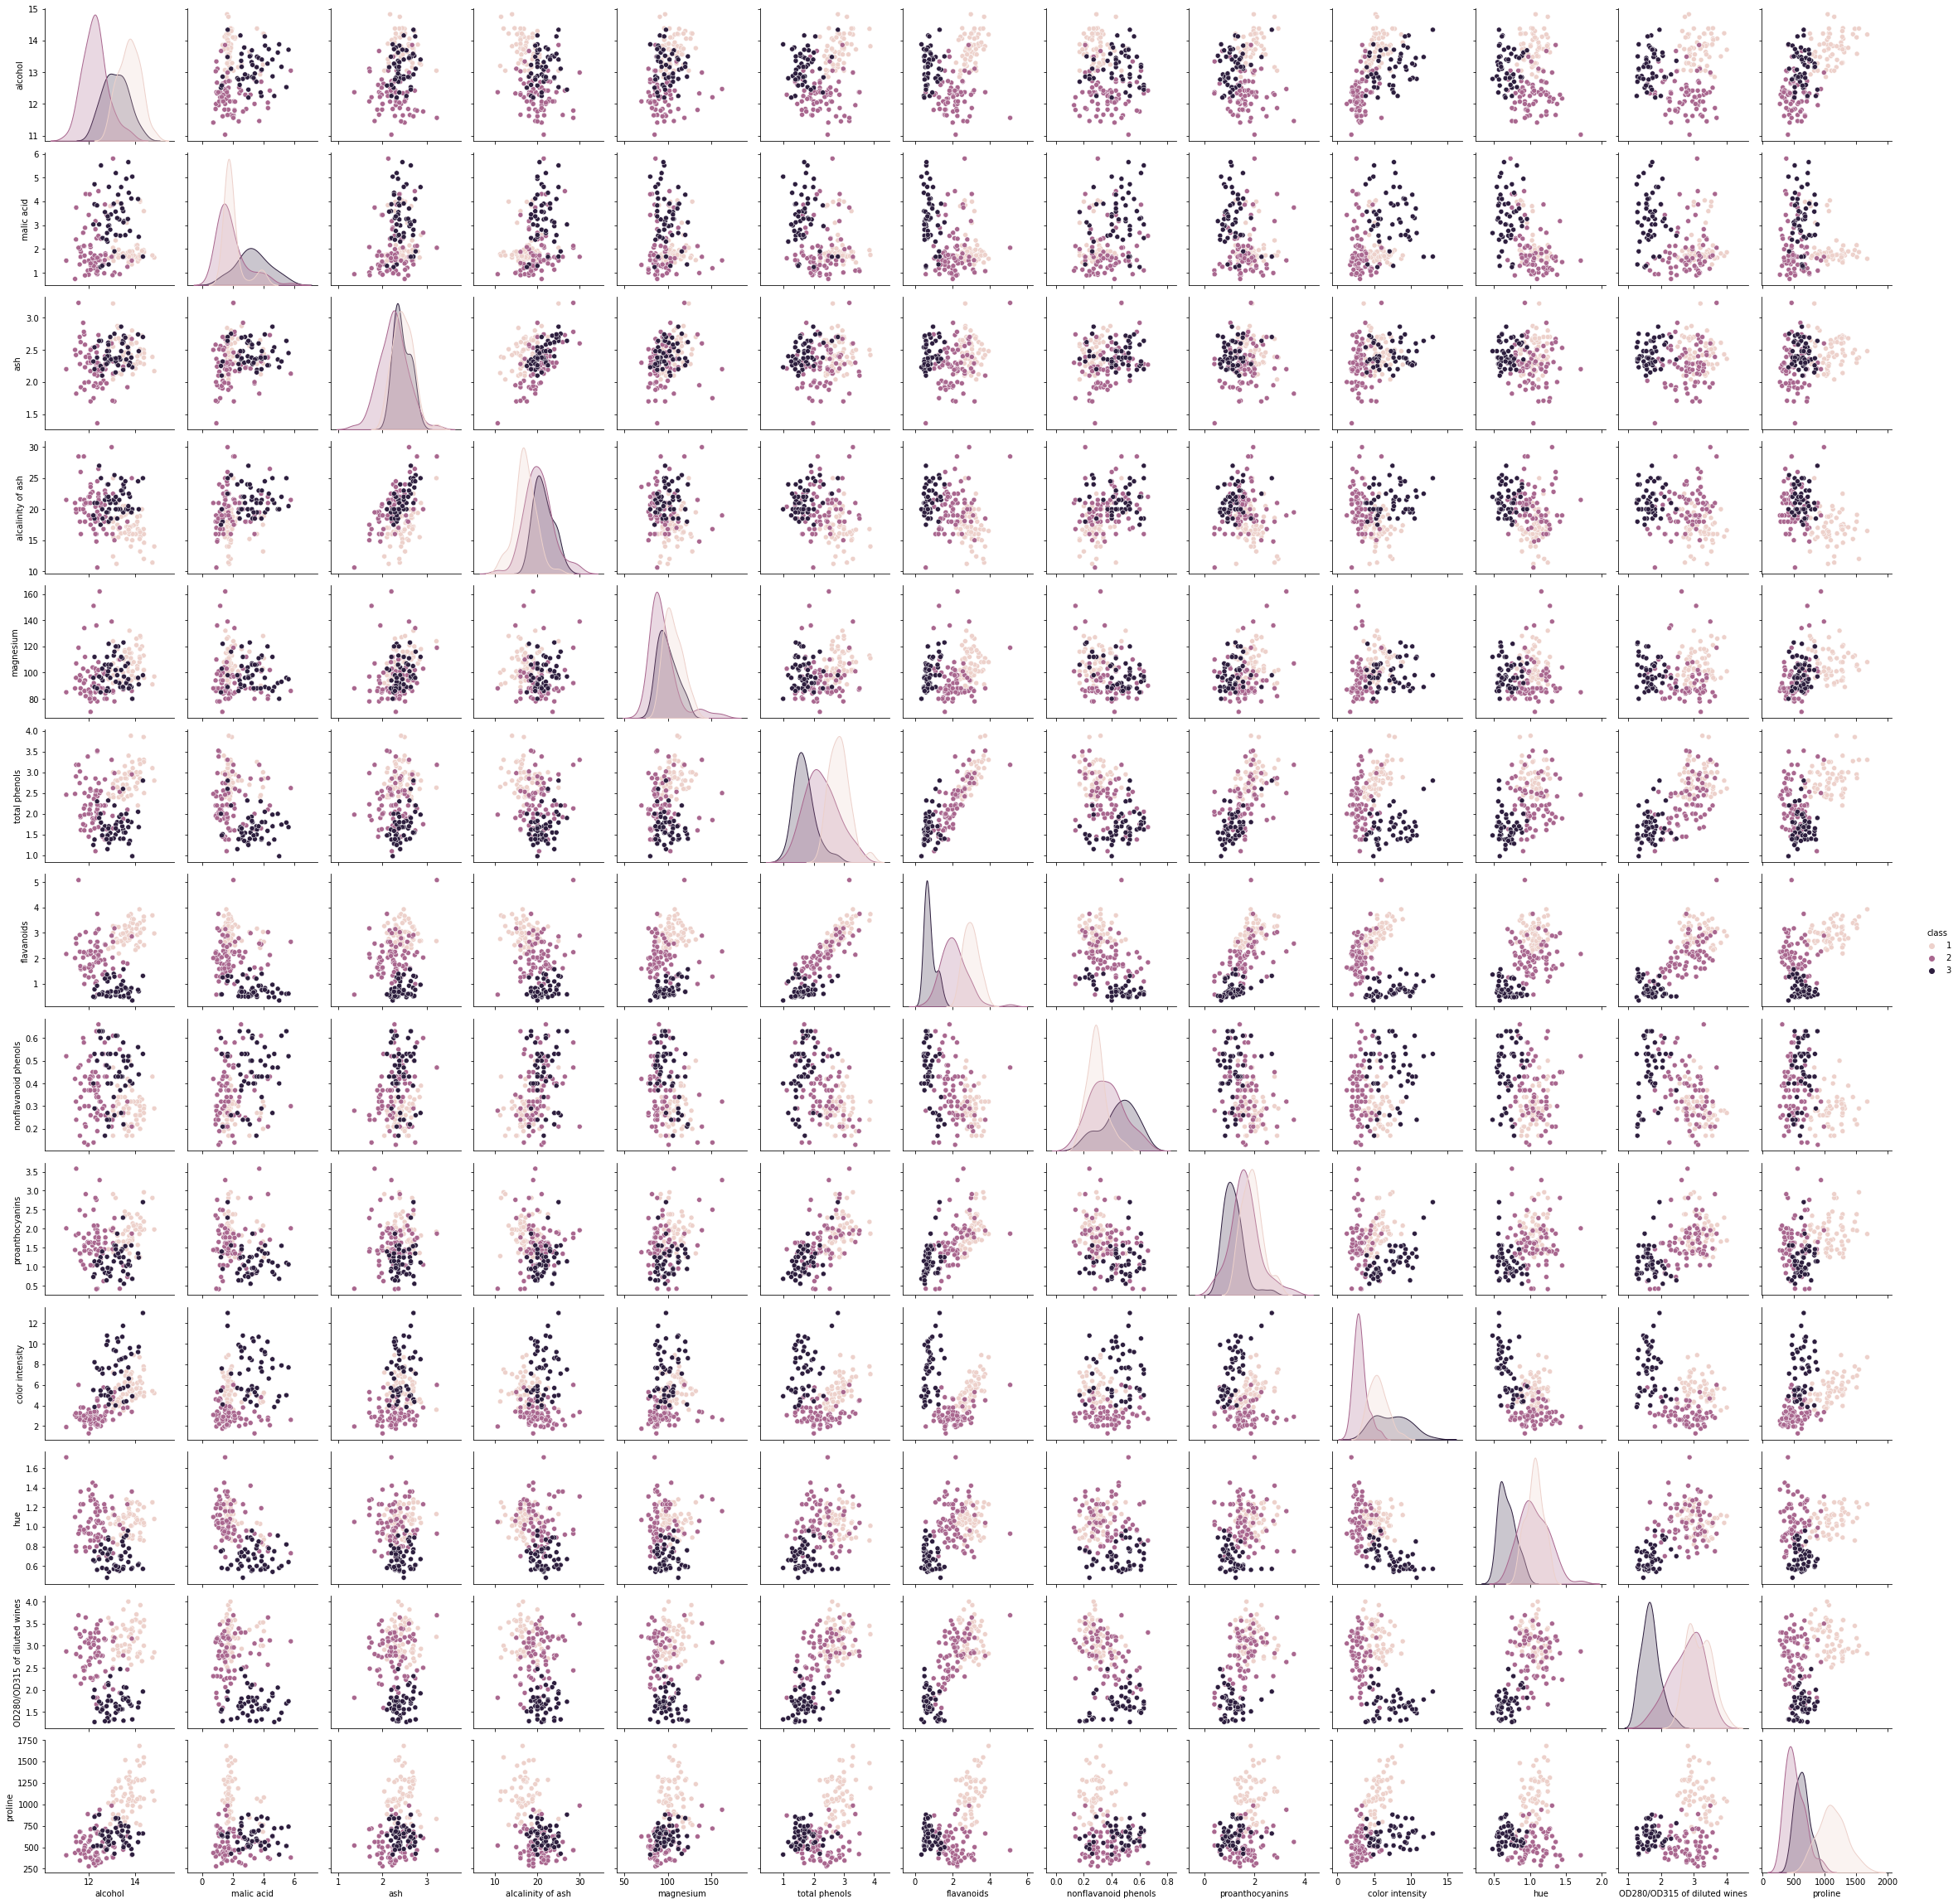

In [9]:
#menampilkan ploting dataset
sns.pairplot(data, hue="class")